# Import visualiser module

In [6]:
from visualiser import *

<IPython.core.display.Javascript object>


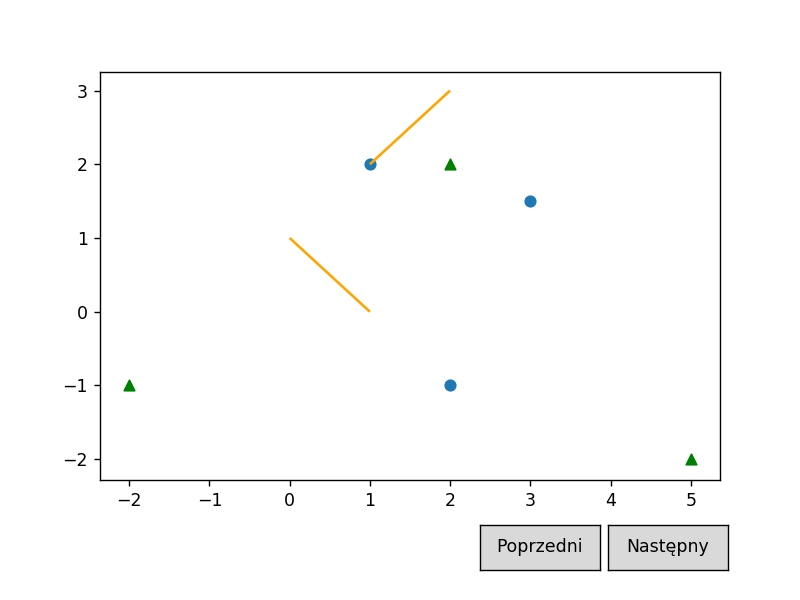

In [7]:
%matplotlib notebook
scenes = [Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]),
                     PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker="^")],
                    [LinesCollection([[(1, 2), (2, 3)], [(0, 1), (1, 0)]], 'orange')]),
              Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'),
                     PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')],
                    [LinesCollection([[(-1, 2), (-2, 3)], [(0, -1), (-1, 0)]])])]

plot = Plot(scenes)
plot.draw()


## Create / Import some test cases

In [19]:
import generator 
test1 = generator.test_case_1()
test2 = generator.test_case_2()
scope = (10,100,10,60)

# QuadTree

In [10]:
import quadtree

## QuadTree implementation

In [20]:
tree = quadtree.QuadTree(test1)

solution = tree.find(*scope)
print(solution)

[(60, 40), (20, 10), (60, 10)]


<IPython.core.display.Javascript object>


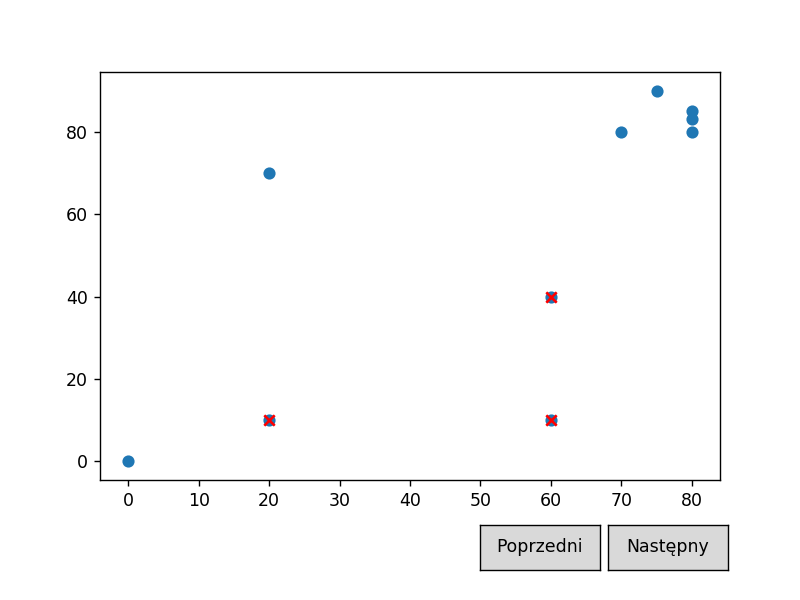

In [21]:
scenes = [Scene([PointsCollection(test1),
                     PointsCollection(solution, color='red', marker="x")])]
plot = Plot(scenes)
plot.draw()


## KD-Tree

In [15]:
import kdtree

In [23]:
kd = kdtree.Kdtree(test1)
solution_kd = kd.find(*scope)
print(solution_kd)

[(20, 10), (60, 10), (60, 40)]


<IPython.core.display.Javascript object>


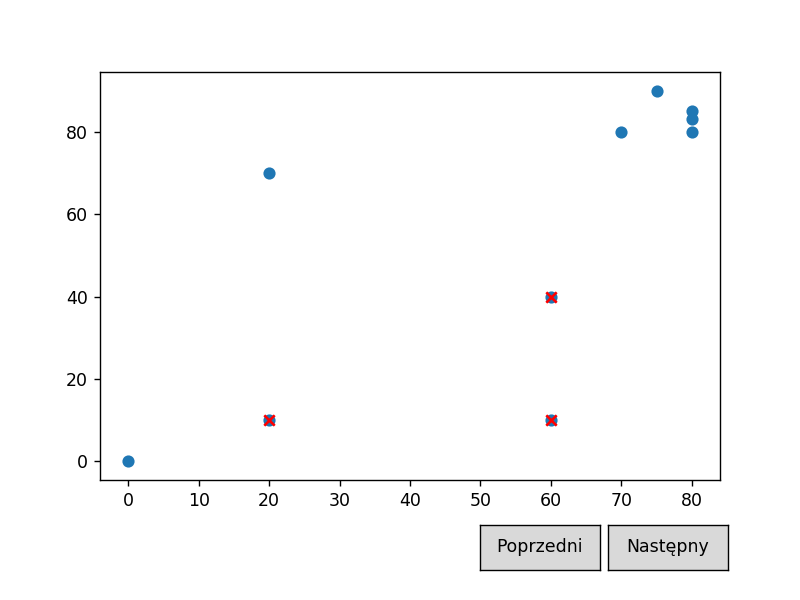

In [24]:
scenes = [Scene([PointsCollection(test1),
                     PointsCollection(solution_kd, color='red', marker="x")])]
plot = Plot(scenes)
plot.draw()
